<a href="https://colab.research.google.com/github/HwangJae-won/2021_SEMINAR-IN-STATISTICS/blob/main/deep_learning_prac_code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#동시출력 가능코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [40]:
#check GPU
!nvidia-smi

Thu Apr 15 08:36:38 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    73W / 149W |    184MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

[CPU 대신 GPU를 사용하는 이유] <br>
GPU는 CPU와 달리 병렬 연산이 가능하기 때문에 여려 명령을 동시에 처리할 수 있음. 따라서 연산량이 많은 딥러닝을 다룰 때는 GPU 사용

In [41]:
import tensorflow
tensorflow.keras.__version__

'2.4.0'

## 1. Data set
: minist data-hand written digit for 10 categories(0 to 9)



```
Goal
classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9)
```



In [42]:
from tensorflow.keras.datasets import mnist

#load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [43]:
#train data
train_images.shape
len(train_labels)
train_labels

(60000, 28, 28)

60000

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [44]:
#test data
test_images.shape
len(test_labels)
test_labels

(10000, 28, 28)

10000

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## 2. Model
: neural network

In [45]:
from tensorflow.keras import models
from tensorflow.keras import layers

#define our model: f(x; weights)
network = models.Sequential()
#add two layers
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [46]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

3 complie steps: 딥러닝은 여러개의 layer을 적용시켜 data를 transform 시킴. 이 과정을 통하여 y를 예측하기 쉬운 형태로 만들고, 예측하는 것. 

[parameter]
- loss function: how the network measure its perform. good model has smaller loss

- optimizer: the mechanism through which the network will update itself based on the data it sees and its loss function.

- Metrics to monitor during training and testing. 



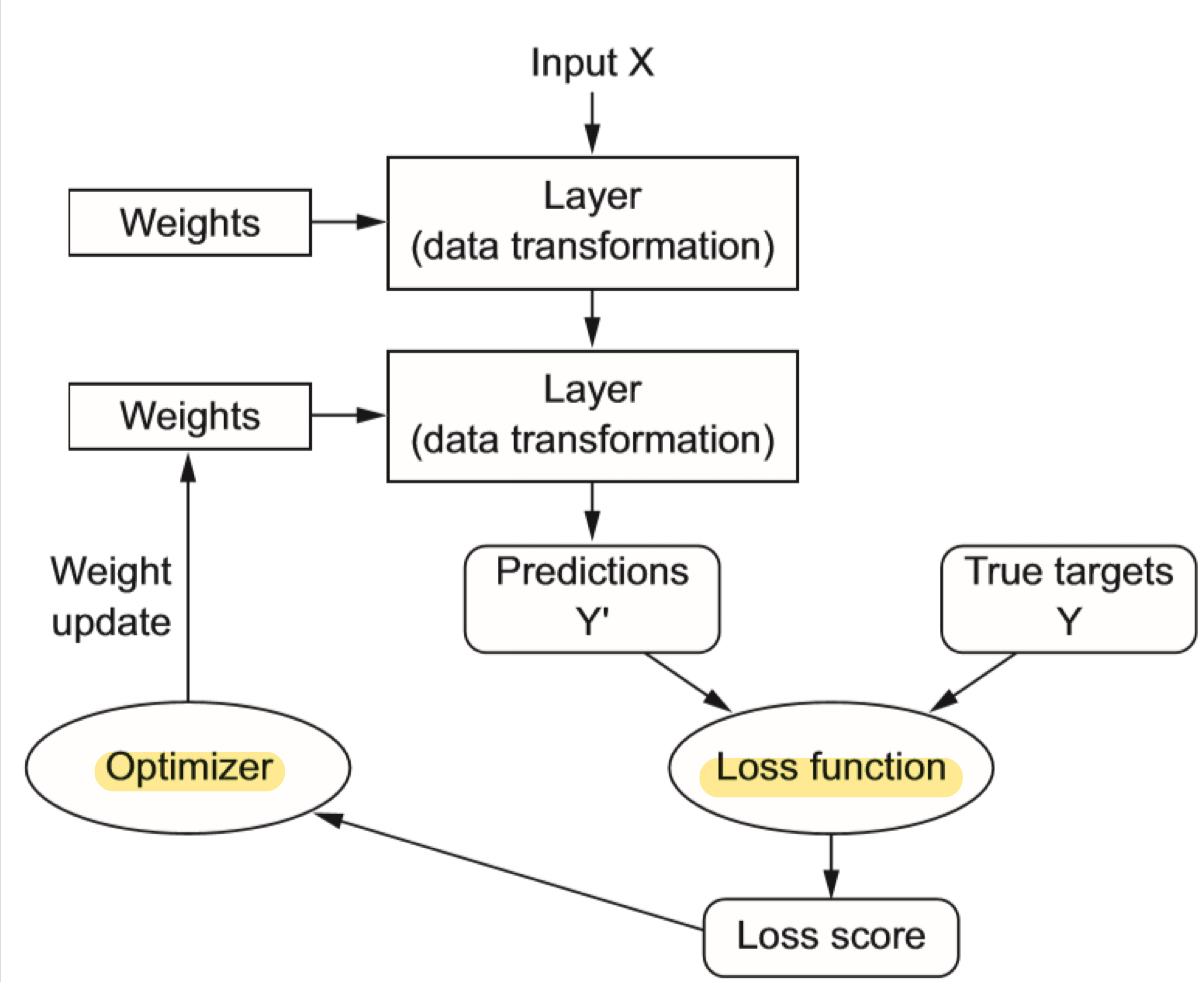

# 3. training images & traing labels

In [47]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255 #normalize data: rescale the value

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [48]:
from tensorflow.keras.utils import to_categorical

# categorically encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 4. Prediction
: train our network model

In [49]:
#model fitting
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4294 - accuracy: 0.8729
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1101 - accuracy: 0.9674
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0695 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0481 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0363 - accuracy: 0.9892


During traing, "loss" and "accuracy" of the network over traing data display. loss getting lower and accuracy getting higher.<br>
We quickly reach an accuracy of 0.989 on the training data.

# 5. Verification

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

training accuracy: 0.989/ test accuracy:  0.979 <br>
This gap between training accuracy and test accuracy is an example of "overfitting".  